<a href="https://colab.research.google.com/github/ifaran1106/Test_Projects/blob/main/weather_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vR2kuC-h2NsscixO6VO3u_xJ8Kr5qOGR3owrgNvXt_010dx2o01Few4ZVx0ihRIT08TiKIKONzW3umE/pub?output=csv'
df=pd.read_csv(url)

In [3]:
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614189,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [4]:
df['Rain'] = df['Rain'].replace({'rain': 1, 'no rain': 0})

<ipython-input-4-9002dd49510d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Rain'] = df['Rain'].replace({'rain': 1, 'no rain': 0})


In [5]:
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614189,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,0
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,0
2497,28.108274,43.817178,2.897128,75.842952,999.119187,0
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,0


In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
X

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,23.720338,89.592641,7.335604,50.501694,1032.378759
1,27.879734,46.489704,5.952484,4.990053,992.614189
2,25.069084,83.072843,1.371992,14.855784,1007.231620
3,23.622080,74.367758,7.050551,67.255282,982.632013
4,20.591370,96.858822,4.643921,47.676444,980.825142
...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181
2496,27.558479,46.481744,10.884915,39.715133,1008.590961
2497,28.108274,43.817178,2.897128,75.842952,999.119187
2498,14.789275,57.908105,2.374717,2.378743,1046.501875


In [8]:
y

,Rain
0,1
1,0
2,0
3,1
4,0
...,...
2495,0
2496,0
2497,0
2498,0


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [12]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'], 'C':[0.01, 0.1, 1, 10, 100], 'max_iter':[200, 300, 400, 500, 1000]}

In [13]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)


In [14]:
classifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
250 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [200, 300, 400, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [15]:
print(classifier_regressor.best_score_)

0.9285333333333334


In [16]:
print(classifier_regressor.best_params_)

{'C': 10, 'max_iter': 200, 'penalty': 'l2'}


In [17]:
y_pred=classifier_regressor.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,classification_report

In [19]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9376


In [20]:
import joblib

joblib.dump(classifier_regressor.best_estimator_, "weather_model.pkl")

joblib.dump(scaler, "scaler.pkl")

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [21]:
import joblib
import numpy as np

model = joblib.load("weather_model.pkl")
scaler = joblib.load("scaler.pkl")

def predict_weather():
    print("Enter Weather Conditions for Prediction:")
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    wind_speed = float(input("Wind Speed (km/h): "))
    cloud_cover = float(input("Cloud Cover (%): "))
    pressure = float(input("Pressure (hPa): "))

    input_data = np.array([[temperature, humidity, wind_speed, cloud_cover, pressure]])
    input_scaled = scaler.transform(input_data)

    prediction = model.predict(input_scaled)[0]

    if prediction == 1:
        print("\n🌧️ Prediction: It will RAIN! Carry an umbrella. ☔")
    else:
        print("\n☀️ Prediction: No rain expected. Enjoy your day! 😎")

if __name__ == "__main__":
    predict_weather()

Enter Weather Conditions for Prediction:
Temperature (°C): 10
Humidity (%): 20
Wind Speed (km/h): 100
Cloud Cover (%): 100
Pressure (hPa): 100

☀️ Prediction: No rain expected. Enjoy your day! 😎


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


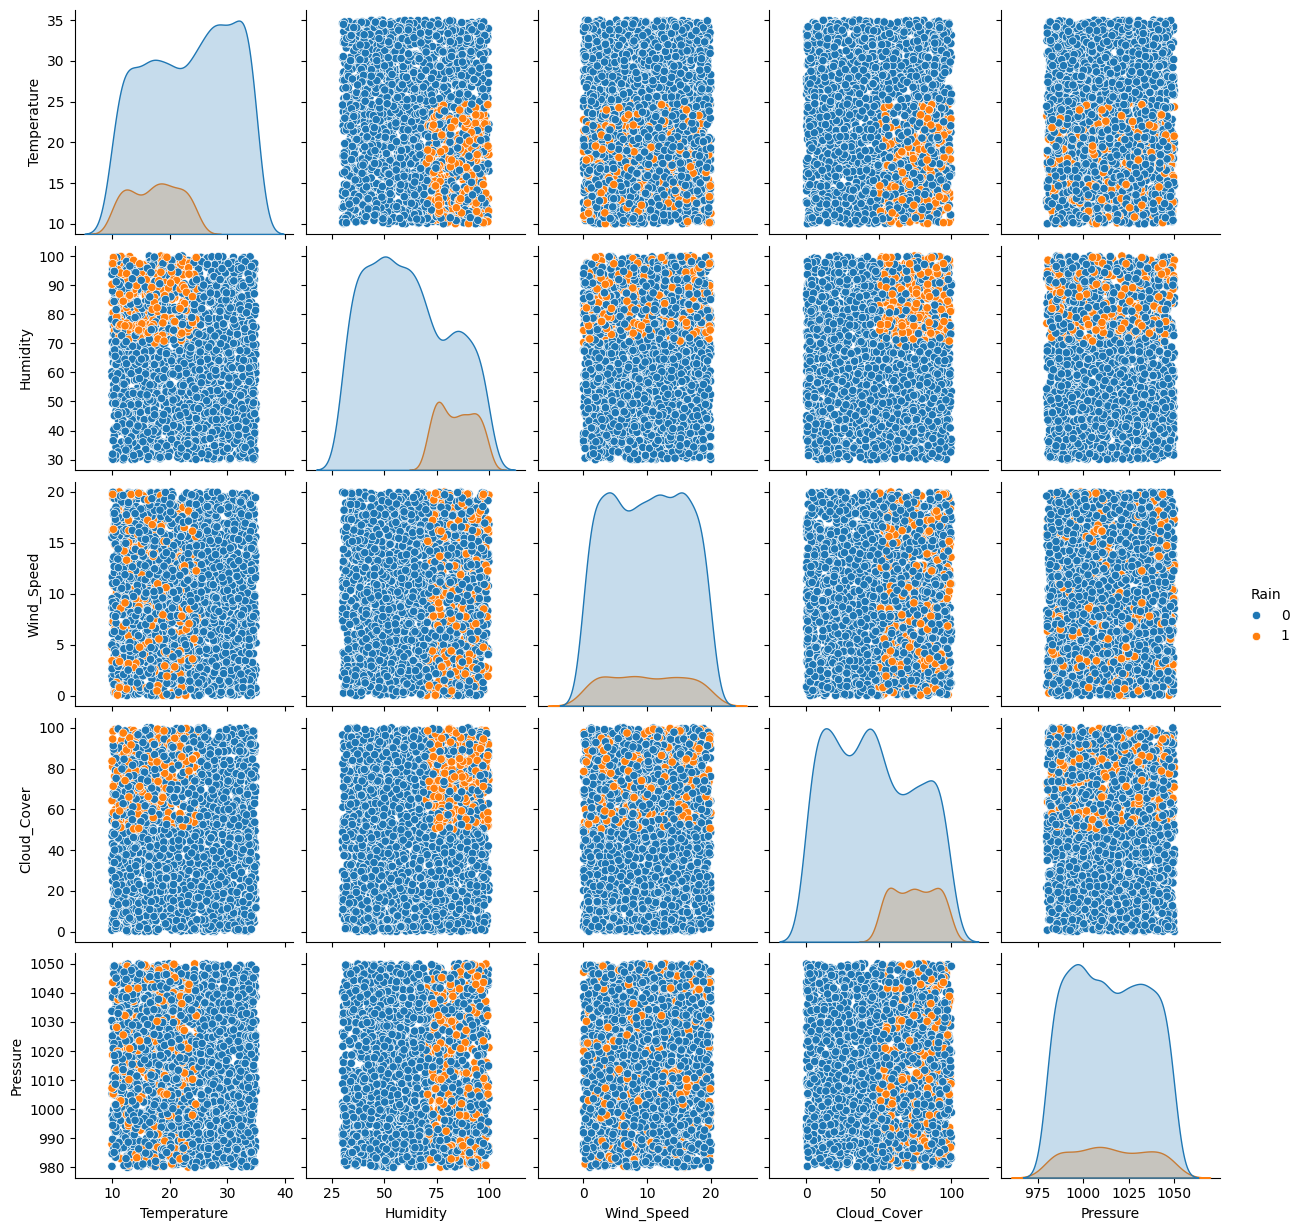

In [22]:
sns.pairplot(df, hue='Rain', diag_kind='kde')
plt.show()